# Ensembles

### Nesse projeto iremos usar um método de Ensemble para fazer predição.

**Mais afinal o que é ensemble ?**

*Os métodos do Ensemble combinam vários algoritmos de base de árvores para construir melhor desempenho preditivo do que um único algoritmo de base de árvore. O principal princípio por trás do modelo de conjunto é que um grupo de alunos fracos se reúne para formar um aluno forte, aumentando assim a precisão do modelo. Quando tentamos prever a variável de destino usando qualquer técnica de aprendizado de máquina, as principais causas de diferença nos valores reais e previstos são ruído, variação e viés. O Ensemble ajuda a reduzir esses fatores (exceto o ruído, que é um erro irredutível).*

<img src="https://i.imgur.com/cwarXoF.jpeg" />

*Para resumir melhor os métodos do Ensemble usam vários algoritmos de aprendizado para obter um melhor desempenho preditivo do que o obtido por qualquer um dos algoritmos de aprendizado constituintes.*

## Nesse projeto iremos usar o Dataset do Kaggle.

<img src="https://i.imgur.com/ONOZC4X.jpg" />

https://www.kaggle.com/c/digit-recognizer/data

**MNIST DATASET - RECONHECIMENTO DE DÍGITOS**

*Iremos usar o método de ensemblo para reconhecimento de dígitos*

In [16]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline



import warnings
warnings.filterwarnings("ignore")

In [17]:
data = pd.read_csv('test.csv')

In [18]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


## Verificando a variável target:

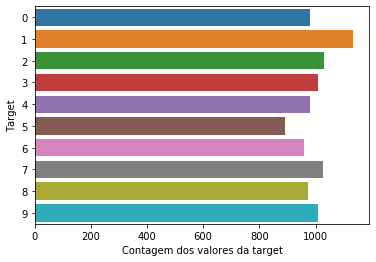

In [20]:
sns.countplot(y=data.label ,data=data)
plt.xlabel("Contagem dos valores da target")
plt.ylabel("Target")
plt.show()

In [21]:
data.label.value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: label, dtype: int64

*Por se tratar de um dataset para modelos de machine learning os dados já estão ajustados.*

*Podemos ver isso pela target que está balanceada.*

## Separação dos dados: 

*A primeira coluna possui o target, de acordo com a documentação.*

In [24]:
df_y = data.iloc[:,0]

In [25]:
df_y.head()

0    7
1    2
2    1
3    0
4    4
Name: label, dtype: int64

*captura das demais colunas com os valores dos pixels de cada dígito.*

In [27]:
df_x = data.iloc[:,1:]

In [28]:
df_x.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Visualização de um único elemento:**

In [29]:
df_x.iloc[0,:]

1x1      0
1x2      0
1x3      0
1x4      0
1x5      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Name: 0, Length: 784, dtype: int64

**Vamos colocar em um numpy array os dados de um único elemento para visualização:**

In [30]:
exemplo = np.array(df_x.iloc[0,:])
exemplo

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

**Agora vamos transformar os dados que estão em um vetor para uma matriz 28 x 28, isso vai nos ajudar a visualizar o dígito na tela:**

In [32]:
exemplo = exemplo.reshape(28,28)
exemplo

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

**Apresentação do dígito na tela:**

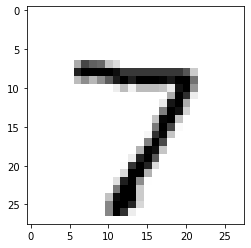

In [34]:
digito = plt.imshow(exemplo,cmap=plt.cm.binary)

**Verificação do valor Target para este elemento:**

In [36]:
df_y[0]

7

# Agora vamos rodar um modelos classificados para podemos comparar com o modelo de ensamble:

## Decision Tree Classifier

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [40]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
dt.score(x_test,y_test)

0.807

**Ok, obtivemos um score de 0.80 utilizando o Decision Tree, Agora iremos utilizar o método de Ensamble mais precisamente Random Forest**

# Random Forest

*Afinal o que é Random Forest ?*

*A Random Forest é um método de aprendizado de máquina altamente versátil, com inúmeras aplicações que variam de marketing a cuidados de saúde e seguros. Pode ser usado para modelar o impacto do marketing na aquisição, retenção e rotatividade de clientes ou para prever o risco e a suscetibilidade de doenças nos pacientes*

<img src="https://i.imgur.com/pC0CGb2.png" />

*Em Random Forrest, cada árvore do conjunto é construída a partir de uma amostra retirada com substituição (ou seja, uma amostra de autoinicialização) do conjunto de treinamento. Além disso, em vez de usar todos os recursos, um subconjunto aleatório de recursos é selecionado, randomizando ainda mais a árvore.*

crédito: https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d

In [47]:
rf = RandomForestClassifier(n_estimators=30, verbose = 1)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.0s finished


0.9385

**Por fim obtivemos um score de 0.94 em nosso modelo,  o médodo de ensemble se mostra muito eficaz para nos ajudar no processo de machine learning.**